In [1]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
%matplotlib inline

## Acquire

In [2]:
colnames=['ip', 'timestamp', 'request_method', 'status', 'size',
          'destination', 'request_agent']
df_orig = pd.read_csv('http://python.zach.lol/access.log',          
                 engine='python',
                 header=None,
                 index_col=False,
                 names=colnames,
                 sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                 na_values='"-"',
                 usecols=[0, 3, 4, 5, 6, 7, 8]
)

new = pd.DataFrame([["95.31.18.119", "[21/Apr/2019:10:02:41+0000]", 
                     "GET /api/v1/items/HTTP/1.1", 200, 1153005, np.nan, 
                     "python-requests/2.21.0"],
                    ["95.31.16.121", "[17/Apr/2019:19:36:41+0000]", 
                     "GET /api/v1/sales?page=79/HTTP/1.1", 301, 1005, np.nan, 
                     "python-requests/2.21.0"],
                    ["97.105.15.120", "[18/Apr/2019:19:42:41+0000]", 
                     "GET /api/v1/sales?page=79/HTTP/1.1", 301, 2560, np.nan, 
                     "python-requests/2.21.0"],
                    ["97.105.19.58", "[19/Apr/2019:19:42:41+0000]", 
                     "GET /api/v1/sales?page=79/HTTP/1.1", 200, 2056327, np.nan, 
                     "python-requests/2.21.0"]], columns=colnames)

df = df_orig.append(new)

In [3]:
df.head()

,ip,timestamp,request_method,status,size,destination,request_agent
0,97.105.19.58,[16/Apr/2019:19:34:42 +0000],"""GET /api/v1/sales?page=81 HTTP/1.1""",200,512495,NaN,"""python-requests/2.21.0"""
1,97.105.19.58,[16/Apr/2019:19:34:42 +0000],"""GET /api/v1/items HTTP/1.1""",200,3561,NaN,"""python-requests/2.21.0"""
2,97.105.19.58,[16/Apr/2019:19:34:44 +0000],"""GET /api/v1/sales?page=82 HTTP/1.1""",200,510103,NaN,"""python-requests/2.21.0"""
3,97.105.19.58,[16/Apr/2019:19:34:46 +0000],"""GET /api/v1/sales?page=83 HTTP/1.1""",200,510003,NaN,"""python-requests/2.21.0"""
4,97.105.19.58,[16/Apr/2019:19:34:48 +0000],"""GET /api/v1/sales?page=84 HTTP/1.1""",200,511963,NaN,"""python-requests/2.21.0"""


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13978 entries, 0 to 3
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ip              13978 non-null  object
 1   timestamp       13978 non-null  object
 2   request_method  13978 non-null  object
 3   status          13978 non-null  int64 
 4   size            13978 non-null  int64 
 5   destination     25 non-null     object
 6   request_agent   13978 non-null  object
dtypes: int64(2), object(5)
memory usage: 873.6+ KB


In [5]:
df.groupby('destination').count()

,ip,timestamp,request_method,status,size,request_agent
destination,,,,,,
"""http://localhost:8888/notebooks/acquire.ipynb""",1,1,1,1,1,1
"""http://localhost:8889/notebooks/timeseries_acquisition.ipynb""",1,1,1,1,1,1
"""https://ds.codeup.com/8.3_Acquire/""",3,3,3,3,3,3
"""https://python.zach.lol/""",4,4,4,4,4,4
"""https://python.zach.lol/api/V1/HiZach!""",1,1,1,1,1,1
"""https://python.zach.lol/api/v1/""",2,2,2,2,2,2
"""https://python.zach.lol/api/v1//api/v1/items""",1,1,1,1,1,1
"""https://python.zach.lol/api/v1//api/v1/items/next_page""",1,1,1,1,1,1
"""https://python.zach.lol/api/v1//api/v1/items?page=2""",1,1,1,1,1,1


In [6]:
df.timestamp = df.timestamp.str.replace(r'(\[|\+0000\])', '', regex=True)
df.timestamp = df.timestamp.str.replace(':', ' ', 1)
df = df.set_index('timestamp')

In [7]:
df['request_agent'] = df.request_agent.str.replace('"', '')
df['request_method'] = df.request_method.str.replace('"', '')
df['destination'] = df.destination.str.replace('"', '')
df['request_method'] = df.request_method.str.replace(r'\?page=[0-9]+', '', regex=True)

In [8]:
df.head()

,ip,request_method,status,size,destination,request_agent
timestamp,,,,,,
16/Apr/2019 19:34:42,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,NaN,python-requests/2.21.0
16/Apr/2019 19:34:42,97.105.19.58,GET /api/v1/items HTTP/1.1,200,3561,NaN,python-requests/2.21.0
16/Apr/2019 19:34:44,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510103,NaN,python-requests/2.21.0
16/Apr/2019 19:34:46,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510003,NaN,python-requests/2.21.0
16/Apr/2019 19:34:48,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,511963,NaN,python-requests/2.21.0


## Anomaly Detection

In [9]:
df.groupby('ip').count()

,request_method,status,size,destination,request_agent
ip,,,,,
173.173.113.51,1059,1059,1059,0,1059
24.26.242.9,21,21,21,0,21
3.88.129.158,1,1,1,0,1
3.92.201.136,1,1,1,0,1
34.207.64.242,1,1,1,0,1
34.229.70.250,1,1,1,0,1
35.174.209.2,1,1,1,0,1
35.175.171.137,2,2,2,0,2
45.23.250.16,1,1,1,0,1


In [10]:
ip_df = pd.DataFrame(df.ip.value_counts(dropna=False)).reset_index().\
                rename(index=str, columns={'index': 'ip', 'ip': 'ip_count'})
ip_df['ip_prob'] = ip_df.ip_count/df.ip.count()
df = df.merge(ip_df)

In [11]:
df[df['ip_prob'] < .01].ip.value_counts()

68.201.219.223    21
24.26.242.9       21
52.87.230.102      2
35.175.171.137     2
70.121.214.34      2
52.90.165.200      1
52.91.30.150       1
3.92.201.136       1
45.23.250.16       1
95.31.18.119       1
54.172.14.223      1
34.229.70.250      1
35.174.209.2       1
95.31.16.121       1
3.88.129.158       1
97.105.15.120      1
34.207.64.242      1
54.145.52.184      1
Name: ip, dtype: int64

<AxesSubplot:xlabel='size'>

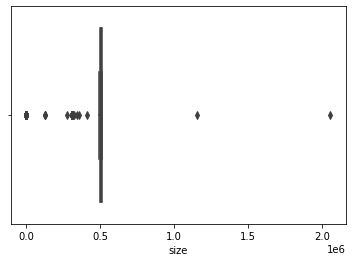

In [12]:
# Finding outliers by size

sns.boxplot(data = df, x = 'size')

In [13]:
df[df['size'] > 1000000]

,ip,request_method,status,size,destination,request_agent,ip_count,ip_prob
11998,97.105.19.58,GET /api/v1/sales/HTTP/1.1,200,2056327,NaN,python-requests/2.21.0,11999,0.858420
13975,95.31.18.119,GET /api/v1/items/HTTP/1.1,200,1153005,NaN,python-requests/2.21.0,1,0.000072


In [14]:
# This IP address is unique and has an outrageously outlying size as well, something is amiss

df[df['ip'] == '95.31.18.119']

,ip,request_method,status,size,destination,request_agent,ip_count,ip_prob
13975,95.31.18.119,GET /api/v1/items/HTTP/1.1,200,1153005,NaN,python-requests/2.21.0,1,0.000072


In [15]:
# Let's look at the lower outliers

q1 = df['size'].quantile(.25)
q3 = df['size'].quantile(.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
lower_bound

484656.0

In [16]:
# Lower outliers with low ip probabilities

df[(df['size'] < 400000) & (df['ip_prob'] < .01)]

,ip,request_method,status,size,destination,request_agent,ip_count,ip_prob
11999,3.92.201.136,GET / HTTP/1.1,200,42,NaN,Slackbot-LinkExpanding 1.0 (+https://api.slack...,1,0.000072
12000,52.90.165.200,GET /favicon.ico HTTP/1.1,200,162,NaN,Slackbot 1.0 (+https://api.slack.com/robots),1,0.000072
12001,3.88.129.158,GET /api/v1/items HTTP/1.1,200,3561,NaN,Slackbot-LinkExpanding 1.0 (+https://api.slack...,1,0.000072
12002,34.207.64.242,GET /favicon.ico HTTP/1.1,200,162,NaN,Slackbot 1.0 (+https://api.slack.com/robots),1,0.000072
12003,54.172.14.223,GET /api/v1/ HTTP/1.1,200,162,NaN,Slackbot-LinkExpanding 1.0 (+https://api.slack...,1,0.000072
12004,34.229.70.250,GET /favicon.ico HTTP/1.1,200,162,NaN,Slackbot 1.0 (+https://api.slack.com/robots),1,0.000072
12005,35.175.171.137,GET / HTTP/1.1,200,42,NaN,Slackbot-LinkExpanding 1.0 (+https://api.slack...,2,0.000143
12006,35.175.171.137,GET /api/v1/items HTTP/1.1,200,3561,NaN,Slackbot-LinkExpanding 1.0 (+https://api.slack...,2,0.000143
12007,54.145.52.184,GET /favicon.ico HTTP/1.1,200,162,NaN,Slackbot 1.0 (+https://api.slack.com/robots),1,0.000072
12009,52.87.230.102,GET /favicon.ico HTTP/1.1,200,162,NaN,Slackbot 1.0 (+https://api.slack.com/robots),2,0.000143


In [17]:
# Last two entries seem unusual, low ip probabilities, low size

df.status.value_counts()

200    13960
499       16
301        2
Name: status, dtype: int64

In [18]:
df[df['status'] > 200]

,ip,request_method,status,size,destination,request_agent,ip_count,ip_prob
1739,97.105.19.58,GET /api/v1/sales HTTP/1.1,499,0,NaN,python-requests/2.20.1,11999,0.858420
1813,97.105.19.58,GET /api/v1/sales HTTP/1.1,499,0,NaN,python-requests/2.20.1,11999,0.858420
4236,97.105.19.58,GET /api/v1/sales HTTP/1.1,499,0,NaN,python-requests/2.21.0,11999,0.858420
4399,97.105.19.58,GET /api/v1/sales HTTP/1.1,499,0,NaN,python-requests/2.21.0,11999,0.858420
4784,97.105.19.58,GET /api/v1/items HTTP/1.1,499,0,NaN,python-requests/2.21.0,11999,0.858420
4856,97.105.19.58,GET /api/v1/items HTTP/1.1,499,0,NaN,python-requests/2.21.0,11999,0.858420
4865,97.105.19.58,GET /api/v1/items HTTP/1.1,499,0,NaN,python-requests/2.21.0,11999,0.858420
5514,97.105.19.58,GET /api/v1/items HTTP/1.1,499,0,NaN,python-requests/2.21.0,11999,0.858420
5533,97.105.19.58,GET /api/v1/sales HTTP/1.1,499,0,NaN,python-requests/2.21.0,11999,0.858420
6854,97.105.19.58,GET /api/v1/sales HTTP/1.1,499,0,NaN,python-requests/2.20.1,11999,0.858420


In [19]:
# 13976 and 13977 appear again 

df.groupby('request_agent').count()

,ip,request_method,status,size,destination,ip_count,ip_prob
request_agent,,,,,,,
Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0,8,8,8,8,0,8,8
"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36",2,2,2,2,1,2,2
"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36",4,4,4,4,4,4,4
"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36",34,34,34,34,20,34,34
Python-urllib/3.7,1,1,1,1,0,1,1
Slackbot 1.0 (+https://api.slack.com/robots),6,6,6,6,0,6,6
Slackbot-LinkExpanding 1.0 (+https://api.slack.com/robots),7,7,7,7,0,7,7
python-requests/2.20.1,1911,1911,1911,1911,0,1911,1911
python-requests/2.21.0,12005,12005,12005,12005,0,12005,12005


In [20]:
df[df['request_agent'] == 'Python-urllib/3.7']

,ip,request_method,status,size,destination,request_agent,ip_count,ip_prob
6687,97.105.19.58,GET /api/v1/items&page=0 HTTP/1.1,200,162,NaN,Python-urllib/3.7,11999,0.85842
